<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_DSDO/blob/main/Text_analysis/word_embedding%26text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from gensim.models import Word2Vec

# Example sentences
sentences = [['cat', 'sat', 'on', 'the', 'mat'],
             ['dog', 'sat', 'on', 'the', 'rug']]

# Train CBOW model
cbow_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)

# Train Skip-gram model
skipgram_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=1)

In [18]:
# Print word vectors
for word in cbow_model.wv.key_to_index:
    print(word, cbow_model.wv.get_vector(word))

the [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
on [ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
sat [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
rug [-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
  0.08077437 -0.05930896  0.00045162 -0.04753734]
dog [-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
mat [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
cat [-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]


In [19]:
# Print word vectors
for word in skipgram_model.wv.key_to_index:
    print(word, skipgram_model.wv.get_vector(word))

the [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
on [ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
sat [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
rug [-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
  0.08077437 -0.05930896  0.00045162 -0.04753734]
dog [-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
mat [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
cat [-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]


In [220]:
# Get similar words
similar_words = skipgram_model.wv.most_similar('cat', topn=5)
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

dog: 0.614398181438446
mat: -0.04264536499977112
sat: -0.08937527239322662
rug: -0.11387497186660767
on: -0.1799870878458023


In [221]:
skipgram_model.wv.similarity('cat','dog')

0.6143981

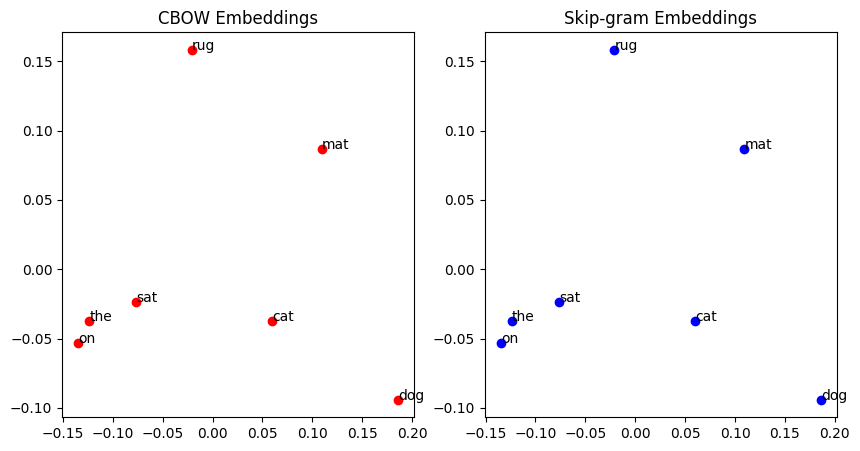

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get word vectors
cbow_vectors = cbow_model.wv[cbow_model.wv.index_to_key]
skipgram_vectors = skipgram_model.wv[skipgram_model.wv.index_to_key]

# PCA transformation
pca = PCA(n_components=2)
cbow_pca = pca.fit_transform(cbow_vectors)
skipgram_pca = pca.fit_transform(skipgram_vectors)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(cbow_pca[:, 0], cbow_pca[:, 1], color='red')
axes[1].scatter(skipgram_pca[:, 0], skipgram_pca[:, 1], color='blue')
for i, word in enumerate(cbow_model.wv.index_to_key):
    axes[0].annotate(word, (cbow_pca[i, 0], cbow_pca[i, 1]))
    axes[1].annotate(word, (skipgram_pca[i, 0], skipgram_pca[i, 1]))
axes[0].set_title('CBOW Embeddings')
axes[1].set_title('Skip-gram Embeddings')
plt.show()

In [23]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227145 sha256=364600a7a0a37e8f1635bb401e92f0f9a8448802e7632dd277752f914f88a64a
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [25]:
# Create sample data and write it to a file
sample_text = """Machine learning is fascinating.
Artificial intelligence is the future.
Natural language processing enables machines to read text.
Deep learning is a subset of machine learning.
Neural networks are key in deep learning."""

with open("sample_data.txt", "w") as file:
    file.write(sample_text)

In [34]:
import fasttext

# Train an unsupervised model with the Skip-gram approach
model = fasttext.train_unsupervised('sample_data.txt', minCount=1, ws = 2, model='skipgram')

# Vector size (dim) specifies the size of the word vectors.
# Window size (ws) specifies the size of the window of words around the target word used in training.
# Minimum counts (minCount) specifies the minimum number of occurrences of words to be included in the training.
# Epochs (epoch) is the number of times the model passes over the entire dataset during training.
# Word N-Grams (wordNgrams) defines the maximum length of word n-gram to be considered for creating word features.
# Character ngrams (minx and maxn) controls the lengths of character n-grams considered for each word. This is especially important for morphologically rich languages.

In [35]:
# Get the word vector for 'learning'
vector = model.get_word_vector('learning')
print("Vector for 'learning':\n", vector)

# Find similar words
print("\nWords similar to 'learning':")
similar_words = model.get_nearest_neighbors('learning', 10)
for score, word in similar_words:
    print(f"{word}: {score:.4f}")


Vector for 'learning':
 [ 7.82976684e-04 -2.45435891e-04 -5.69682161e-04  1.16606592e-04
  2.57212287e-05 -1.99166443e-05 -4.94298758e-04 -8.75192229e-04
  8.49103613e-04 -6.62688471e-05 -1.48577645e-04 -4.90656712e-05
 -6.03424443e-04  1.76270318e-04 -5.27153956e-04  4.32759916e-05
 -3.18157632e-04 -2.58094398e-04 -1.04721391e-03  1.88952952e-04
  3.58082849e-04 -5.78822626e-04  2.48706754e-04  1.90370614e-04
  4.90675622e-04 -6.08088099e-04  5.38432447e-04 -4.04491497e-04
 -3.82268161e-04  4.44940815e-04  2.13447885e-04  6.15764700e-04
 -5.36552572e-04  9.92012792e-04 -5.92317083e-04 -1.74144108e-04
 -2.21600669e-04 -2.54857077e-05 -1.94362190e-04  5.11036080e-04
 -6.42232422e-04  1.59275092e-04  5.56781830e-04 -6.14781020e-05
  3.06993461e-04  3.30762152e-04 -3.14885488e-04  3.83634178e-04
  1.50947366e-04  6.36365497e-04 -1.41252967e-04  4.31907829e-04
  5.93392528e-04 -1.58560986e-04 -8.11894715e-04  8.61623339e-05
 -3.01387499e-05 -5.55683044e-04 -5.35976142e-04 -4.70865198e-04
 

In [185]:
import pandas as pd

colnames = ['category', 'product description']
df = pd.read_csv('ecommerceDataset.csv', header=None, names=colnames)
df.head()

,category,product description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [186]:
len(df)

50425

In [187]:
df.isnull().sum()

category               0
product description    1
dtype: int64

In [188]:
df = df.dropna()

In [189]:
df.duplicated().sum()

22622

In [190]:
df = df.drop_duplicates()

In [192]:
# convert the relevant column to lowercase
df['product description'] = df['product description'].str.lower()

In [193]:
import re
# Remove new line characters ("/n")
df['product description'] = df['product description'].map(lambda x: re.sub('\s+', ' ', x))
# Remove non-word characters, so numbers and ___ etc
df['product description'] = df['product description'].str.replace("[^A-Za-z]", " ", regex = True)
# Remove overspace
df['product description'] = df['product description'].map(lambda x: re.sub('\s{2,}', " ", x))

In [194]:
#map categories into numbers by getting unique categories
unique_categories = df.category.unique()

In [195]:
unique_categories

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [196]:
df.category.value_counts()

category
Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: count, dtype: int64

In [197]:
df['category'] = df['category'].str.replace('Clothing & Accessories', 'Clothing&Accessories')

In [198]:
df_labeled = df.copy()
df_labeled['category_index'] = '__label__' + df_labeled['category'].astype(str)
df_labeled.head()

,category,product description,category_index
0,Household,paper plane design framed wall hanging motivat...,__label__Household
1,Household,saf floral framed painting wood inch x inch sp...,__label__Household
2,Household,saf uv textured modern art print framed painti...,__label__Household
3,Household,saf flower print framed painting synthetic inc...,__label__Household
4,Household,incredible gifts india wooden happy birthday u...,__label__Household


In [199]:
#put category and product_title together
#format I want: __label__ product
category_prod = df_labeled['category_index'] + " " + df_labeled['product description']
print(category_prod)

0        __label__Household paper plane design framed w...
1        __label__Household saf floral framed painting ...
2        __label__Household saf uv textured modern art ...
3        __label__Household saf flower print framed pai...
4        __label__Household incredible gifts india wood...
                               ...                        
50402    __label__Electronics micromax bharat plus zero...
50403    __label__Electronics microsoft lumia gb g blac...
50407    __label__Electronics microsoft lumia black gb ...
50408    __label__Electronics karbonn titanium wind w w...
50410    __label__Electronics nokia lumia dual sim grey...
Length: 27802, dtype: object


In [200]:
from sklearn.model_selection import train_test_split
#split into train and test
train, test = train_test_split(category_prod, test_size=0.3, train_size=0.7, random_state=42)

In [201]:
train.to_csv("train.txt",index = False)
test.to_csv("test.txt",index = False)

In [203]:
#train model
model = fasttext.train_supervised(input="train.txt", epoch=15)

In [204]:
#test using the model
model.test("test.txt") #(n, precision, recall)

(8341, 0.9500059944850737, 0.9500059944850737)

In [208]:
model.predict("This story is very interesting.")

(('__label__Books',), array([0.99998975]))

In [206]:
model.predict("this dress has extra large size")

(('__label__Clothing&Accessories',), array([0.97394693]))

In [218]:
model.predict("this shirt is very comfortable")

(('__label__Clothing&Accessories',), array([0.99951065]))